In [15]:
import qiskit as qkt
import numpy as np

Encodings de informação clássica para qubits:

1 - Basis encoding

2 - Amplitude encoding

3 - Phase encoding

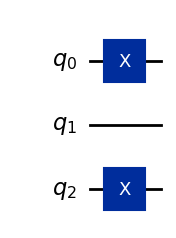

In [19]:
''' Basis enconding '''

qc1 = qkt.QuantumCircuit(3) # Cria o circuito quântico com 3 qubits
qc1.x(0) # Primeiro qubit vira 1
qc1.x(2) # Terceiro qubit vira 1

qc1.draw(output='mpl')

In [22]:
''' Amplitude encoding  '''
from qiskit.quantum_info import Statevector

# Vetor clássico normalizado
data = np.array([1, 2, 1.5, 3])

# Normalizar os dados
data = data / np.linalg.norm(data) # Por que é definida assim?

# Cria um estado quântico com os valores do vetor clássico
state = Statevector(data)

# Cria um circuito quãntico com os dados iniciais codificados sobre as amplitudes
qc2 = qkt.QuantumCircuit(2)
qc2.initialize(state, [0,1])

qc2.draw()

┌─────────────────────────────────────────────┐
q_0: ┤0                                            ├
     │  Initialize(0.24807,0.49614,0.3721,0.74421) │
q_1: ┤1                                            ├
     └─────────────────────────────────────────────┘

In [ ]:
''' Phase encoding 
Aprendo depois
'''


Manipulação básica de circuitos quânticos
- Uso de compose();
- decompose();
- to_instruction();
- e to_gate().

In [ ]:
qc3 = qkt.QuantumCircuit(2)
qc3.x(0)
qc3.cz(0, 1)

qc4 = qkt.QuantumCircuit(2, name='qc_peia')
qc4.x(0)
qc4.cy(1,0)

qc3.draw()

┌───┐   
q_0: ┤ X ├─■─
     └───┘ │ 
q_1: ──────■─

In [31]:
qc4.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ Y ├
     └───┘└─┬─┘
q_1: ───────■──

In [ ]:
qc_combined = qc3.compose(qc4)
print(qc_combined) # Tem como fazer a combinação verticalmente ao invés de horizontalmente?

     ┌───┐   ┌───┐┌───┐
q_0: ┤ X ├─■─┤ X ├┤ Y ├
     └───┘ │ └───┘└─┬─┘
q_1: ──────■────────■──
                       


In [ ]:
qc_combined_decomp = qc_combined.decompose()
print(qc_combined_decomp) # Não entendi esse resultado e como ele é obtido

     ┌───────────┐     ┌───────────┐┌─────┐┌───┐┌───┐
q_0: ┤ U3(π,0,π) ├──■──┤ U3(π,0,π) ├┤ Sdg ├┤ X ├┤ S ├
     └───┬───┬───┘┌─┴─┐└───┬───┬───┘└─────┘└─┬─┘└───┘
q_1: ────┤ H ├────┤ X ├────┤ H ├─────────────■───────
         └───┘    └───┘    └───┘                     


In [45]:
inst = qc4.to_instruction()
qc2.append(inst, [0,1])

print(qc2)

     ┌─────────────────────────────────────────────┐┌──────────┐
q_0: ┤0                                            ├┤0         ├
     │  Initialize(0.24807,0.49614,0.3721,0.74421) ││  qc_peia │
q_1: ┤1                                            ├┤1         ├
     └─────────────────────────────────────────────┘└──────────┘


In [ ]:
qc2.data.pop() # Retira as portas que foram appendadas no circuito quântico
print(qc2)

     ┌─────────────────────────────────────────────┐
q_0: ┤0                                            ├
     │  Initialize(0.24807,0.49614,0.3721,0.74421) │
q_1: ┤1                                            ├
     └─────────────────────────────────────────────┘


In [49]:
# Define o circuito quântico qc3 como uma nova porta que pode ser reutilizada
porta_customizada = qc3.to_gate() 
print(porta_customizada)

Instruction(name='circuit-187', num_qubits=2, num_clbits=0, params=[])


In [50]:
'''Estudar melhor depois os circuitos parametrizados e como utilizá-los '''

'Estudar melhor depois os circuitos parametrizados e como utilizá-los '